In [1]:
from misc import load, load_class_labels
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset_root = "./dataset/"

train_dir = dataset_root + "train_set/"
val_dir = dataset_root + "val_set/"
val_degraded_dir = dataset_root + "val_set_degraded/"

sample_rate = 1
train_info = load(dataset_root + 'labels/train.csv', 1, sample_rate)
val_info = load(dataset_root + 'labels/validation.csv')
test_info = load(dataset_root + 'labels/test.csv')

train_image_names = train_info.iloc[:, 0].values
val_image_names = val_info.iloc[:, 0].values

train_labels = train_info.iloc[:, 1].values
val_labels = val_info.iloc[:, 1].values

class_labels = load_class_labels(dataset_root + 'classes.txt')

## Generate split over dataset

Uncommenting the last line, a train and a validation will be extracted by the train_info_dirty file and write out to csv. Load function used generate a stratified split on the sets.

In [1]:
import pandas as pd
def generate_csv_split():
    train_info = load(dataset_root + 'train_info_dirty.csv', 1, 0.8)
    val_info = load(dataset_root + 'train_info_dirty.csv', 1, 1)

    same = val_info['filename'].isin(train_info['filename'])
    val_info.drop(val_info[same].index, inplace=True)

    train_info.to_csv(dataset_root + '/labels/train.csv', header=False, index=False);
    val_info.to_csv(dataset_root + '/labels/validation.csv', header=False, index=False);

#generate_csv_split()

## Analysis on train set

In [3]:
y_train_analysis = pd.DataFrame(train_labels)

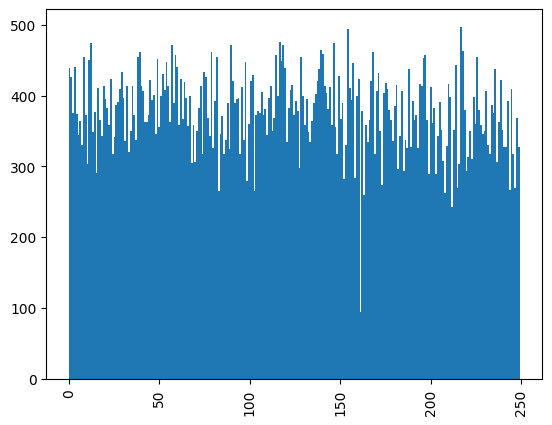

In [4]:
counts, bins = np.histogram(y_train_analysis, bins=251)
plt.hist(bins[:-1], 251, weights=counts);
plt.xticks(rotation=90);

#plt.savefig('./data_distribution.svg')

### Print most and less frequent labels

In [ ]:
df = pd.DataFrame({'labels': class_labels, 'freq': counts})

In [ ]:
df.sort_values(by=['freq'])[:10]

,labels,freq
162,marble_cake,94
213,veal_cordon_bleu,243
164,hamburger,260
209,welsh_rarebit,262
103,sauerbraten,265
83,steak_tartare,266
245,matzo_ball,267
248,moo_goo_gai_pan,269
216,lobster_thermidor,269
174,hot_dog,274


In [ ]:
df.sort_values(by=['freq'], ascending=False)[:10]

,labels,freq
218,huitre,497
155,churro,494
117,crab_food,475
147,casserole,474
12,couscous,474
119,coffee_cake,472
90,compote,472
57,gnocchi,471
140,enchilada,464
219,chiffon_cake,463


In [ ]:
frequency = df['freq'].values

print('std: ', frequency.std(), 'mean: ', frequency.mean())

std:  54.53641215254461 mean:  377.61752988047806


## Analysis on validation set

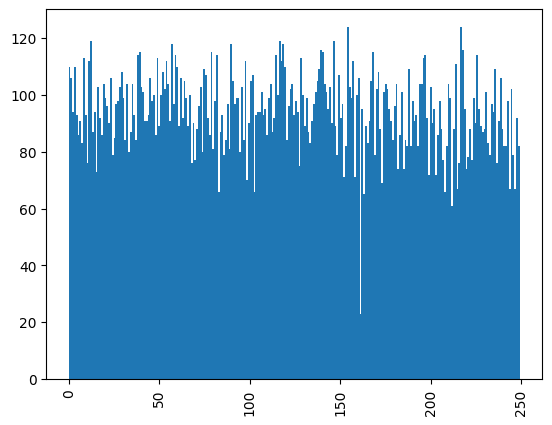

In [ ]:
counts, bins = np.histogram(val_labels, bins=251)
plt.hist(bins[:-1], 251, weights=counts);
plt.xticks(rotation=90);

In [ ]:
df = pd.DataFrame({'labels': class_labels, 'freq': counts})

In [ ]:
df.sort_values(by=['freq'])[:10]

,labels,freq
162,marble_cake,23
213,veal_cordon_bleu,61
164,hamburger,65
209,welsh_rarebit,66
103,sauerbraten,66
83,steak_tartare,66
248,moo_goo_gai_pan,67
245,matzo_ball,67
216,lobster_thermidor,67
174,hot_dog,69


In [ ]:
df.sort_values(by=['freq'], ascending=False)[:10]

,labels,freq
218,huitre,124
155,churro,124
117,crab_food,119
12,couscous,119
147,casserole,119
90,compote,118
57,gnocchi,118
119,coffee_cake,118
219,chiffon_cake,116
140,enchilada,116


In [ ]:
frequency = df['freq'].values

print('std: ', frequency.std(), 'mean: ', frequency.mean())

std:  13.646935676243737 mean:  94.39442231075697


## Add collage of images for visualization

The following collage is created by choosing randomly the images from train set

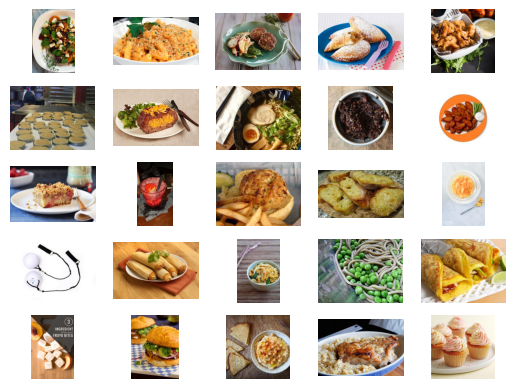

In [2]:
from misc import create_collage_with_random_imgs

create_collage_with_random_imgs('./dataset/complete/', './dataset/collage_out/', n=5, image_names=train_image_names)